In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:, :-1], data[:, -1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
class LRClassifier(object):
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))
    
    def data_matrix(self, X):
        data_mat = list()
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat
    
    def fit(self, X, y):
        data_mat = self.data_matrix(X)
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(self.learning_rate, self.max_iter))
        
    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [5]:
lr_clf = LRClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [6]:
lr_clf.score(X_test, y_test)

0.975

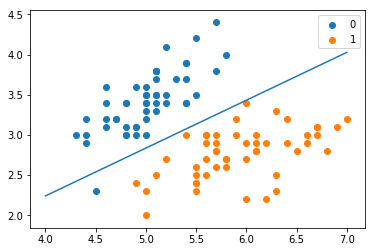

In [7]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression(max_iter=200)

In [10]:
clf.fit(X_train, y_train)

/Users/huangweijian01/Projects/ml/bluebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
clf.score(X_test, y_test)

0.975